In [163]:
from shape_utils.pyhks import trimesh, hks
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors, distance_WKS, saveWKSColors
from shape_utils.functional_maps import calculate_functional_maps, compute_shape_difference
from shape_utils.pyFM_pdbe import functional 

import os
import seaborn as sns
from matplotlib import pyplot as plt

input_list = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/list_three_clusters_dirs_files.txt')
mesh_data = input_list.read().splitlines()
dim_data_matrix = len(mesh_data)
pairs_meshes = get_pairs (mesh_data)

print(pairs_meshes)
shape_diffs_ops =[]
FM_matrices = []

#file_mesh1 = mesh_data[0]

#for i in range(len(mesh_data)):
for pair in pairs_meshes:    
    file_mesh1 = pair[0]
    file_mesh2 = pair[1]
    #file_mesh2 = mesh_data[i]
    
    mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
    mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)

    model1 = functional.FunctionalMapping(mesh1,mesh2) 


    neigvecs = 200
    ndescr = 100
    step = 1
    n_ev = 50
    output = './example_data/'
    descr = 'WKS'
    landmarks = None

    descr1,descr2,paramlist = calculate_descriptors(model1,neigvecs,n_ev,ndescr,step,landmarks,output,descr)
    D_area,D_conformal,p2p_21,FM = calculate_functional_maps(model1,n_cpus=8,refine= None)

    shape_diffs_ops.append(D_area)
    FM_matrices.append(FM)

[('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/7c66-B.off', '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/7c66-B.off'), ('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/7c66-B.off', '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/7c67-A.off'), ('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/7c66-B.off', '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/7c67-B.off'), ('/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/surface_meshes/outputs/output_off_files/7c66-B.off', '/Users/gdiazleines/results/shape-retrieval/benchmarki

KeyboardInterrupt: 

In [123]:
Q53W80_Diff_operators = shape_diffs_ops
P71447_Diff_operators = shape_diffs_ops

In [154]:
def get_non_diagonal_elements(matrix):
    non_diagonal_elements = []
    rows, cols = len(matrix), len(matrix[0])

    for i in range(rows):
        for j in range(cols):
            if i != j:  # Exclude diagonal elements                                                                                     
                non_diagonal_elements.append(matrix[i][j])

    return non_diagonal_elements

def percentage_close_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)
    
    # Count the number of elements within the threshold
    close_elements_count = np.sum(diff_matrix < threshold)
    
    # Calculate the total number of elements in the matrix
    total_elements = rows * cols
    
    # Calculate the percentage of elements close to the identity matrix
    percentage_close = (close_elements_count / total_elements) * 100
    
    return percentage_close

def plot_array(values):
    plt.plot(values)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Plot of Array Values')
    plt.grid(True)
    plt.show()

def get_pairs(arr):
    pairs = []
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if i <= j:
                pairs.append((arr[i], arr[j]))
    return pairs
def get_pairs_two(array1, array2):
    pairs = []
    for item1 in array1:
        for item2 in array2:
            pairs.append((item1, item2))
    return pairs

In [5]:

def diff_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)

    return diff_matrix

import numpy as np

def similarity_to_diagonal(matrix):
    # Compute the Frobenius norm of the input matrix
    norm_original = np.linalg.norm(matrix)

    # Create a diagonal matrix with the same diagonal elements as the original matrix
    diagonal_matrix = np.diag(np.diag(matrix))

    # Compute the Frobenius norm of the diagonal matrix
    norm_diagonal = np.linalg.norm(diagonal_matrix)

    # Compute the similarity as the ratio of the norms
    similarity = norm_diagonal / norm_original

    return similarity

6.814376346952077 6.638194484798848 2.0463815654104045 1.5623639270403404


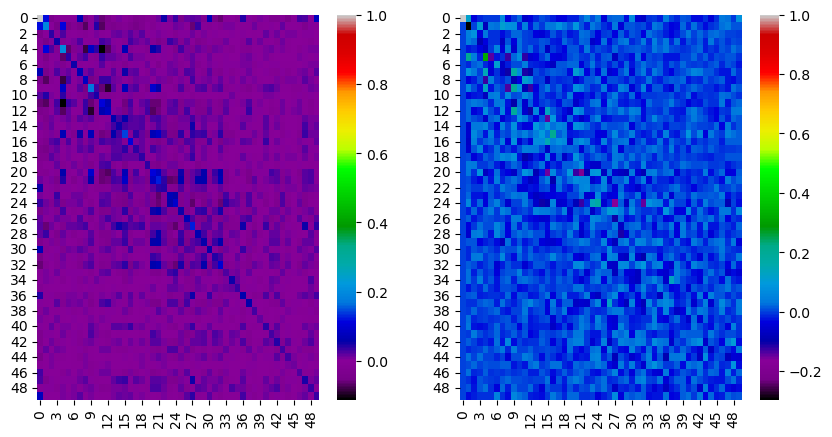

In [122]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt

def plot_mesh(myMesh,cmap=None):
    mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist, myMesh1.facelist, c=cmap1, s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2, s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap



diff_FM = diff_to_identity(np.absolute(FM))
diff_Da = diff_to_identity(np.absolute(D_area))

D_area = shape_diffs_ops[5]
FM = FM_matrices[5]

cmap1 = visu(mesh1.vertlist); cmap2 = cmap1[p2p_21]
#double_plot(mesh1,mesh2,cmap1,cmap2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

sns.heatmap(D_area,ax=ax1,cmap ='nipy_spectral')
sns.heatmap(FM,ax=ax2, cmap='nipy_spectral')

plt.savefig("./matrix_whitespace.png", dpi=96)


#calculate distance from eigenvalues 


#


#calculate norm of F-I 
diff_FM = diff_to_identity(np.absolute(FM))

#diff_FM_2 = diff_to_identity(np.absolute(FM_2)) 

diff_Da = diff_to_identity(np.absolute(D_area))
#diff_Da_2 = diff_to_identity(np.absolute(D_area_2)) 
#diff_FM_3 = diff_to_identity(FM_3)

norm1 = norm(diff_FM, 'fro')
norm_FM = norm(np.absolute(FM),'fro')
norm_Da = norm(np.absolute(D_area),'fro')
norm_diff_Da = norm(diff_Da,'fro')
print(norm1,norm_diff_Da,norm_FM,norm_Da)

sim_diagonal= similarity_to_diagonal(FM)
#print("Similarity to diagonal matrix:", sim_diagonal, av_diagonal)

In [162]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import napari_shape_odyssey 

eigenvalues_SDO_matrices = []
eigenvalues_FM_matrices = []

scores_FM =[]

for i in range(len(FM_matrices)): 

    #eigenvalues_SDO_matrices.append(eigenvalues_SDO)
    #eigenvalues_SDO = np.linalg.eigvals(shape_diffs_ops[i])

    eigenvalues_FM = np.linalg.eigvals(FM_matrices[i])
    eigenvalues_FM_matrices.append(np.real(eigenvalues_FM))
    #plot_array(np.real(eigenvalues_FM))

    result = np.sqrt(np.sum(np.log(np.absolute(np.real(eigenvalues_FM))) ** 2))

    scores_FM.append(result)

print(scores_FM)

eigenvalues_stack = np.stack(eigenvalues_FM_matrices)
df = pd.DataFrame(eigenvalues_stack, columns = [f'lambda_{i}' for i in range(eigenvalues_stack.shape[1])])
df.head()

dim_data_matrix = len(mesh_data)


sym_matrix = np.zeros((dim_data_matrix, dim_data_matrix))
row, col = np.triu_indices(dim_data_matrix)  # Upper triangular indices
sym_matrix[row, col] = scores_FM
sym_matrix[col, row] = scores_FM


fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(sym_matrix,ax=ax1,cmap ='nipy_spectral')


#non_diag = get_non_diagonal_elements(FM_4)
#abs_non_diag = np.absolute(non_diag)
#print(np.sum(abs_non_diag))
#diagonal_FM = np.diag(FM)
#plot_array(diagonal_FM)
#abs_diag = np.absolute(diagonal_FM)
#av_diagonal=np.sum(diagonal_FM)/len(diagonal_FM)


[0.00038860460918871057, 18.872268317156948, 16.498951569580896, 16.432904850390596, 17.470085642334304, 22.022169106731518, 23.601884406250548, 29.209655120897615, 29.711003195962743, 28.268290067618388, 26.618536726277366, 27.014734437493676, 28.83853627184958, 28.451016881757695, 29.588801592706616, 31.61697842655645, 30.569680030080463, 30.273658550595613, 29.239729528162066, 0.000318836488629763, 19.612171466019355, 15.48933069760182, 20.816860669979516, 17.458288132055447, 25.91817856253513, 30.0963579867408, 27.53830638336083, 29.72129168906707, 28.47886148388502, 26.43593351394754, 27.803102131743053, 27.649489701451788, 33.110234743942975, 29.209856495094307, 30.045008837412436, 28.96621930729925, 26.538319496046455, 0.0008501353842943981, 17.87409412516254, 17.84755723647258, 20.121097025152636, 21.775680650733587, 29.5766065815287, 28.601581534062422, 28.47149433638218, 32.20863459772549, 29.829781029744712, 28.35710093964788, 29.427695660576024, 31.389443247529385, 31.22621

ValueError: shape mismatch: value array of shape (177,) could not be broadcast to indexing result of shape (190,)

In [67]:
# Fit a linear curve to every row of the dataframe and divide every value in the row by the slope of the curve

slope = []
intercept = []
for i in range(0, len(df)):
    x = np.arange(0, len(df.columns))
    y = df.iloc[i].values
    m, b = np.polyfit(x, y, 1)
    slope.append(m)
    intercept.append(b)
print(slope)
df = df.div(slope, axis=0)

[1.0000000000000002, 1.0000000000000007, 1.0, 0.9999999999999999]


In [95]:
import tqdm
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd 



x = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

finalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf.head()


,principal component 1,principal component 2
0,-3.397231,5.554309
1,-5.639050,-5.057551
2,6.197325,-2.453644
3,2.838956,1.956887


In [96]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))

[[4.465802252688616e-15, 34.730993128399994, 31.588323826251163, 29.859734639312183, 30.8210398785884, 39.68634009535058, 42.67314457269697, 52.6737684212946, 54.17797738851237, 53.10141071792057, 51.52260195871136, 48.81559818318139, 51.044853689591, 52.62202154048962, 54.425954264405156, 54.8951995406475, 57.364737406042266, 55.050542161831785, 50.390080244774545], [34.73099312840006, 1.865402134356464e-12, 27.189279709281777, 28.1338920727436, 27.077386308169405, 31.46939673902507, 33.855096655529344, 38.23242869978992, 40.74820980809041, 39.66207655381134, 38.609352695175915, 35.61952904138196, 38.13292420667798, 38.47454130609896, 40.05388129437642, 40.630392570326464, 43.5810789059502, 40.93168327641293, 36.49060672012448], [31.588323826245542, 27.189279665688378, 2.110602746542234e-11, 26.95870003553566, 25.919291373150397, 30.363132020888774, 33.86158251174127, 39.27909054145691, 41.09951286964684, 40.224770734062346, 39.284005051210904, 35.78210715597451, 38.32609008275363, 39

<AxesSubplot:>

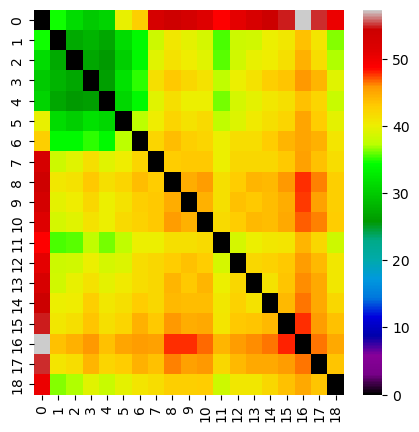

In [132]:
import numpy as np
from numpy.linalg import inv
import pandas as pd 
import matplotlib.pyplot as plt



invD_set = []
DinvD_set = []
eigenvalues_DinvD = []
geo_distances = []

for i in range(len(shape_diffs_ops)):

    invD_area = inv(shape_diffs_ops[i])
    invD_set.append(invD_area)

pairs = get_pairs_two(shape_diffs_ops,invD_set)

dist_mat_dim = (len(shape_diffs_ops))

for pair in pairs:
    DinvD = np.matmul(pair[0],pair[1])
    DinvD_set.append(DinvD)

for elem in DinvD_set:
    eigenvalues = np.linalg.eigvals(elem)
    eigenvalues_DinvD.append(np.real(eigenvalues))

#plot_array(np.real(eigenvalues_DinvD[1328]))

for eigs in eigenvalues_DinvD:
    result = np.sqrt(np.sum(np.log(np.absolute(np.real(eigs))) ** 2))
    geo_distances.append(result)

dist_matrix =[]
dist_matrix_row = []

group_size = dist_mat_dim
dist_matrix = [geo_distances[i:i+group_size] for i in range(0, len(geo_distances), group_size)]

print(dist_matrix)

fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(dist_matrix,ax=ax1,cmap ='nipy_spectral')

